# The Black-Scholes-Merton Model for Option Pricing. 
Black, Scholes, and Merton, in their 1973 seminal work, developed an option hedging framework. 
It was originally derived with a partial differential equation (PDE) approach. 
In later years, researchers generalized the model and developed a rigorous and practical modeling framework with a probabilistic approach. 
The option price is sensitive to changes in the underlying instrument's price. The BSM model attempts to tell what quantity the option writer needs to hold at a given time to perfectly hedge the option, essentially creating a riskless hedging portfolio where all market risks are eliminated. 
Under the BSM model, the price of a non-dividend-paying asset follows a geometric Brownian motion
$$d S_t = \mu S_t dt + \sigma S_t d W_t$$
where $\mu$ and $\sigma>0$ are constants, representing the asset's drift and volatility respectively, $t$ represents time, and $W_t$ is a Wiener process (stochastic process with mean change of zero and variance $\Delta_t$). The process $S_t$ can be written as 
$$S_t = S_0 e^{ \left( \mu-\dfrac{\sigma^2}{2} \right) t+\sigma W_t}$$
Taking the logarithm of $S_t$ gives an arithmetic Brownian motion 
$$\ln{S_t} = \ln{S_0} + \left( \mu - \dfrac{\sigma^2}{2} \right) t + \sigma W_t \sim N \left( \ln{S_0}+(\mu - \dfrac{\sigma^2}{2})t, \sigma^2 t \right) $$
I.e., the distribution of $S_t$ is log-normal. Furthermore, 
$$\mathbb{E}[S_t]=S_0 e^{\mu t}, \;\;\;\;\;\;\; Var(S_t) = S^2_0 e^{2\mu t} \left( e^{\sigma^2 t}-1 \right) $$



## Derivation of the Black-Scholes Equation. 
The Black-Scholes formula is used to determine the price of a European call/put option. 
It makes several simplifying assumptions about the market: 
1. there is no arbitrage possibility.
2. the risk-free rate r is a known constant through time.
3. fractional trading is possible, there are no restrictions on short-selling.
4. there are no transaction costs (the market is frictionless)
5. financial assets follow geometric Brownian motion with constant drift and constant volatility. 

Let $V$ be a European-style option with a non-dividend-paying underlying asset $S$. 
Let $V_t = V(t, S_t)$ denote the option value process. Using Itô's lemma, $S_t$ can be expressed as an Itô process
$$d V_t = \left( \mu S_t \dfrac{\partial V}{\partial S} + \dfrac{1}{2}\sigma^2 S^2_t \dfrac{\partial^2 V}{\partial S^2} + \dfrac{\partial V}{\partial t} \right) dt + \sigma S_t \dfrac{\partial V}{\partial S} d W_t$$



The above formula incorporates the constant volatility of the underlying asset, the time value of money, the option's strike price, and the option's time to expiry. 
The idea of Black-Scholes is to construct a self-financing portfolio with an option and $\Delta$ units of the underlying, i.e.,
$$\Pi_t = V_t - \Delta_t S_t$$
The key point is to find the value of $\Delta_t$ so that the portfolio becomes instantaneously deterministic, i.e., without the term $d W_t$ representing the stochastic movement of the price of underlying. 
The change in the value of this portfolio in one time-step $dt$ is:
$$d \Pi_t = d V_t - \Delta_t d S_t$$
Substituting this into the original expression for the Itô process gives 
$$d \Pi_t = (\mu S_t \dfrac{\partial V}{\partial S} + \dfrac{1}{2}\sigma^2 S^2_t \dfrac{\partial^2 V}{\partial S^2} + \dfrac{\partial V}{\partial t} - \mu \Delta_t S_t)dt + \sigma S_t (\dfrac{\partial V}{\partial S} - \Delta_t) d W_t$$
The first term on the right is deterministic, while the second term is stochastic as it involves $W_t$. Setting $\Delta_t = \dfrac{\partial V}{\partial S}(t, S_t)$, we get the deterministic expression 
$$d \Pi_t = (\dfrac{1}{2}\sigma^2 S^2_t \dfrac{\partial^2 V}{\partial S^2} + \dfrac{\partial V}{\partial t})dt$$ 
Using the assumptions stated earlier, we should have $d \Pi_t = r \Pi_t dt$, or 
$$d V_t = \Delta_t d S_t + r (V_t - \Delta_t S_t) dt$$
If $d \Pi_t > r \Pi_t dt$, an arbitrager could make a riskless profit by borrowing an amount $\Pi_t$ at rate $r$ to invest in the portfolio. 
If $d \Pi_t < r \Pi_t dt$, an arbitrager could make a riskless profit by shorting the portfolio and investing $\Pi_t$ at the risk-free rate $r$.
Therefore, by the no-arbitrage assumption
$$(\dfrac{1}{2}\sigma^2 S^2_t \dfrac{\partial^2 V}{\partial S^2} + \dfrac{\partial V}{\partial t})dt = r \Pi_t dt$$
Replacing $\Pi_t$ by $V_t - \Delta_t S_t$, and $\Delta_t$ by $\partial V / \partial S$, gives the Black-Scholes partial differential equation 
$$\dfrac{\partial V_t}{\partial t} + \dfrac{1}{2}\sigma^2 S^2_t \dfrac{\partial^2 V}{\partial S^2} + r S_t \dfrac{\partial V_t}{\partial S_t} - r V_t = 0$$
Any derivative security whose price depends only on the current value of $S_t$ and on $t$ must satisfy the Black-Scholes equation. 


## Black-Scholes Formulas for Vanilla Options. 
By solving the PDE, closed-form formulas are obtained for European call and put options. 
The time-$t$ value of the vanilla European call with strike $K$ and maturity $T$ is given by 
$$c(t, S_t) = S_t \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2)$$
where $\Phi(x)$ is the normal cumulative distribution function (cdf), and
$$d_1 = \dfrac{\ln{(S_t/K)} + (r+\dfrac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T-t}}, \;\;\;\;\;\;\; d_2 = d_1 - \sigma \sqrt{T-t}$$
The delta is given by $\Delta_c (t,S_t)=\Phi(d_1)$. 
The value of the vanilla European put is given by 
$$p(t, S_t) = K e^{-r(T-t)} \Phi(-d_2) - S_t \Phi(-d_1)$$
where $d_1, d_2$ is the same as for the call. 
The delta is given by $\Delta_p (t,S_t)=\Phi(d_1)-1$. 
For at-the-money forward call/put options, the following approximation formula exists $c(0, S_0) = p(0, S_0) \approx 0.4 S_0 \sigma \sqrt{T}$. 


The following code finds the analytical solution to the Black-Scholes equation for a European call or put. 

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
def black_scholes_analytical(payoff="call", S=100., K=100., tau=1., r=.1, sigma=.2, n=1000):
    """
    Finds the analytical solution to the Black-Scholes equation for European call/put. 

    Args: 
        payoff (str): specifying the option payoff type.
        S (float): the spot stock price S_t of the underlying instrument. 
        K (float): the strike. 
        tau (float):  the time until strike (T-t). 
        r (float): the risk-free rate. 
        sigma (float): the diffusion coefficient/volatility.
        n (int): speciyfing the number of Monte-Carlo simulations.
    Returns:
        price (float): the analytical solution to the Black-Scholes equation. 
    """
    if payoff not in ['call', 'put']:
        raise ValueError("Payoff ", payoff, " not supported. Set 'call' or 'put'")
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(tau))/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    if payoff == "call":
        price = norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*tau)
    elif payoff=="put":
        price = -norm.cdf(-d1)*S + norm.cdf(-d2)*K*np.exp(-r*tau)
    return price

In [8]:
black_scholes_analytical()

13.269676584660886

## Hedging.
### The Greeks. 
Let $\Pi$ be a portfolio composed of options linked to a single asst $S$ and a quantity of the asset itself. In the BSM model, the price of the portfolio $\Pi_t$ depends on the stock price, time to maturity, volatility, and risk-free rate: $\Pi_t = \Pi(T-t, S_t, \sigma, r)$. The sensitivities concerning these parameters are denoted by "The Greeks": 
* Delta: $\Delta_t = \dfrac{\partial \Pi}{\partial s_t}$, measures the value change w.r.t. the price change of the underlying instrument. Delta-hedging consists of holding (long/short depending on the sign of the delta) $\Delta_t$ units of the underlying asset at time $t$. 
* Gamma: $\Gamma_t = \dfrac{\partial^2 \Pi}{\partial s^2_t}$, measures the change of delta w.r.t. the price change of underlying. Zero gamma implies static hedging, i.e., constant delta throughout the entire considered tenor. Non-zero gamma implies dynamic hedging. The gamma of a portfolio can be offset by adding other options having the opposite gamma amount. 
* Theta: $\Theta_t = \dfrac{\partial \Pi}{\partial t}$, measures the change of portfolio or option with time. Is also called time decay. For a delta-neutral portfolio, theta is compensated by the gamma term in Black-Scholes PDE. 
* Vega: $v_t = \dfrac{\partial \Pi}{\partial \sigma}$, measures the impact of volatility. Can, like gamma, be hedged with other options having the opposite amount of vega. The BSM model uses the simplifying assumption that volatility is constant. 
* Rho: $\rho_t = \dfrac{\partial \Pi}{\partial r}$, measures the sensitivity of the portfolio's value w.r.t. the change of risk-free rate. The BSM model uses the simplifying assumption that the risk-free rate is constant. 


The Black-Scholes PDE can be written as 
$\Theta_t + rS_t \Delta_t + \dfrac{1}{2}\Gamma_t \sigma^2 S_t^2 = r \Pi_t $. 
If $\Pi_t$ is delta-neutral ($\Delta_t = 0$) then $\Theta_t + \dfrac{1}{2}\Gamma_t \sigma^2 S_t^2 = r \Pi_t $. 
The Gamma-Theta relationship states that gamma and theta should have opposite signs if their values are large and $r \Pi_t$ is small. 



## Monte Carlo Methods.

A Monte Carlo simulation is a mathematical procedure for sampling random outcomes for a given process. Monte Carlo methods rely on the strong law of large numbers, i.e., assuming i.i.d. random variables $X_1, X_2,...$ and $\mathbb{E}[\left|h(X)\right|]<+\infty$, then, almost surely, 
$$ \lim_{n \rightarrow \infty} \dfrac{1}{n} \sum_{i=1}^n h(X_i) = \mathbb{E}[h(x)] $$

### Estimating the Price of a European Option. 
The price of an option can be written as 
$$ V(t, S_t) = e^{-r(T-t)} \mathbb{E}_t [(S_T - K)^+] $$
The Black-Scholes 
The price of a financial asset $S_T | S_t$ follows a log-normal distribution, which means that $\ln{(S_T)} | S_t$ follows a normal distribution
$$ \ln{(S_T)} | S_t \sim \mathcal{N} \left( \ln{(S_t)} + (r + \dfrac{\sigma^2}{2})(T-t), \sigma^2(T-t) \right) $$

Thus, one can take independent samples $\{ S_i \}_{i=1}^n$ from the log-normal distribution and then calculate their average
$$ \theta_n = e^{-r(T-t)} \dfrac{1}{n} \sum_{i=1}^n (S_i - K)^+ $$
to estimate the value of an option using Monte Carlo methods. 

In [9]:
def black_scholes_monte_carlo(payoff="call", S=100., K=100., tau=1., r=.1, sigma=.2, n=1000):
    """
    Estimates the price of a European option contract using using Monte-Carlo methods as a
    way to estimate Black-Scholes. 

    Args: 
        payoff (str):   option payoff type.
        S (float):      spot stock price S_t of the underlying instrument. 
        K (float):      strike. 
        tau (float):    time until strike (T-t). 
        r (float):      risk-free rate. 
        sigma (float):  diffusion coefficient/volatility.
        n (int):        number of Monte-Carlo simulations.
    Returns:
        mc_est (float): the Monte-Carlo estimate for the option price.
    """
    if payoff not in ['call', 'put']:
        raise ValueError("Payoff ", payoff, " not supported. Set 'call' or 'put'")
    Zs = norm.rvs(loc=0, scale=1, size=n)
    Ss = S*np.exp((r - 0.5*sigma**2)*tau + sigma*np.sqrt(tau)*Zs)
    if payoff == "call":
        Vs = np.exp(-r*tau)*np.maximum(Ss-K, 0)
    elif payoff == "put":
        Vs = np.exp(-r*tau)*np.maximum(K-Ss, 0)
    mc_est = np.mean(Vs)
    return mc_est

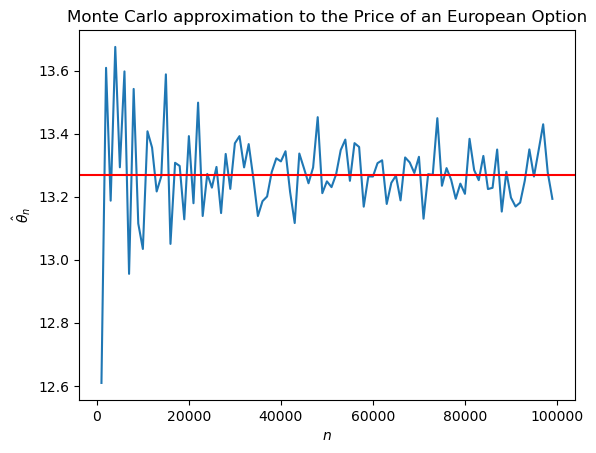

In [10]:
ns = np.arange(1000, 100000, 1000)
estimates = [black_scholes_monte_carlo(n=n) for n in ns]
true_value = black_scholes_analytical()
plt.plot(ns, estimates)
plt.axhline(y = true_value, color='red', label='True Value')
plt.title('Monte Carlo approximation to the Price of an European Option')
plt.xlabel('$n$')
plt.ylabel(r'${\hat{\theta}}_n $')
plt.show()
